In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

#plot parameters
font_size=10
plt.style.use('seaborn-paper')
plt.rc('text', usetex=True)
plt.rc('font',family='serif',serif='Computer Modern')
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('legend', fontsize=font_size-1)

#color list
color_list = ["#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8", "#0c2c84"]
newcm = LinearSegmentedColormap.from_list('ColorMap',color_list)
color_list2 = ["#2b83ba","#fdae61","#d36060","#83b692","#8E7891"] #["#2b83ba","#d7191c","#fdae61"]

## Get data part 1

In [2]:
#get inference
df_list = []
cases = ['v1','v2','v3']
for v in cases:
    for i in range(1,11):
        df = pd.read_parquet(f'./inference/dat/loglikelihood_real_net_{v}_{i}.pq')
        df['case'] = v
        df_list.append(df)
df_ll = pd.concat(df_list)

## Plot part 1

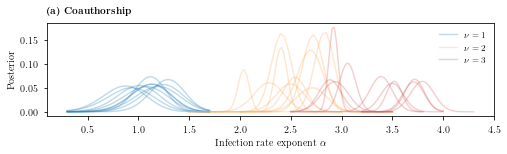

In [3]:
#plot
width = 7.057
height = width/3.5
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.5, hspace=0.6)

for j,v in enumerate(cases):
    df_ll_ = df_ll[df_ll['case'] == v].drop(columns=['case'])
    for i in range(1,11):
        df_ = df_ll_[df_ll_['exp_id'] == i].copy()
        df_['likelihood'] = np.exp(df_['ll'])
        df_ = df_.groupby(by=['nu']).mean().reset_index()
        df_['likelihood'] /= df_['likelihood'].sum()
        if i == 1:
            ax.plot(df_['nu'],df_['likelihood'], color=color_list2[j], alpha=0.3,
                   label=fr'$\nu = {1+j}$')
        else:
            ax.plot(df_['nu'],df_['likelihood'], color=color_list2[j], alpha=0.3,
                   label=None)
ax.legend(frameon=False)
ax.set_xlabel(r'Infection rate exponent $\alpha$')
ax.set_ylabel('Posterior')   

#text
ax.text(0, 1.1, fr"\textbf{{(a) Coauthorship}}", fontsize=font_size, transform=ax.transAxes)
plt.savefig('./figs/inference_real_part1.pdf')

## Get data part 2

In [5]:
#get inference
df_list = []
models = ['power-law']
# models = ['exponential']
#load sociopattern
socio_range = (1,5)
for m in models:
    for i in range(socio_range[0],socio_range[1]+1):
        df = pd.read_parquet(f'./inference/dat/loglikelihood_sociopattern_{m}_exp{i}.pq')
        df['model'] = m
        df['dataset'] = 'sociopattern'
        df_list.append(df)
#load email
email_range = (5,10)
for m in models:
    for i in range(email_range[0],email_range[1]+1):
        df = pd.read_parquet(f'./inference/dat/loglikelihood_email_{m}_exp{i}.pq')
        df['model'] = m
        df['dataset'] = 'email'
        df_list.append(df)
df_ll = pd.concat(df_list)
labels = [fr"\textbf{{(b) High-school contacts}}", fr"\textbf{{(c) Emails}}"]

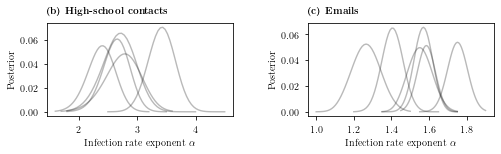

In [6]:
#plot
width = 7.057
height = width/3.5
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.4, hspace=0.6)

#sociopattern
for j,dataset in enumerate(['sociopattern','email']):
    for i,m in enumerate(models):
        df_ll_ = df_ll[df_ll['dataset'] == dataset].copy()
        df_ll_ = df_ll_[df_ll_['model'] == m].drop(columns=['model','dataset'])
        datarange = socio_range if dataset == 'sociopattern' else email_range
        for exp in range(datarange[0],datarange[1]+1):
            df_ = df_ll_[df_ll_['exp_id'] == exp].copy()
            df_['likelihood'] = np.exp(df_['ll'])
            df_ = df_.groupby(by=['alpha']).mean().reset_index()
            df_['likelihood'] /= df_['likelihood'].sum()
            axes[j].plot(df_['alpha'],df_['likelihood'], color='#1a1a1a', alpha=0.3)

        axes[j].set_ylabel('Posterior')   
    axes[j].set_xlabel(r'Infection rate exponent $\alpha$')

    #text
    axes[j].text(0, 1.1, labels[j],
                   fontsize=font_size, transform=axes[j].transAxes)
# plt.savefig('./figs/inference_real_part2.pdf')

## Figure SM

In [10]:
#get inference
df_list = []
# models = ['power-law']
models = ['exponential']
#load sociopattern
socio_range = (1,5)
for m in models:
    for i in range(socio_range[0],socio_range[1]+1):
        df = pd.read_parquet(f'./inference/dat/loglikelihood_sociopattern_{m}_exp{i}.pq')
        df['model'] = m
        df['dataset'] = 'sociopattern'
        df_list.append(df)
#load email
email_range = (5,10)
for m in models:
    for i in range(email_range[0],email_range[1]+1):
        df = pd.read_parquet(f'./inference/dat/loglikelihood_email_{m}_exp{i}.pq')
        df['model'] = m
        df['dataset'] = 'email'
        df_list.append(df)
df_ll = pd.concat(df_list)
labels = [fr"\textbf{{(a) High-school contacts}}", fr"\textbf{{(b) Emails}}"]

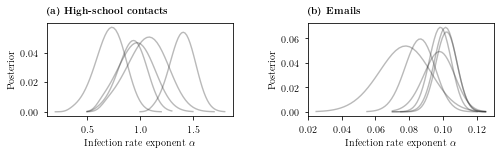

In [12]:
#plot
width = 7.057
height = width/3.5
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(width,height))
plt.subplots_adjust(left=0.1, bottom=0.23, right=0.98,
                    top=0.87, wspace=0.4, hspace=0.6)

#sociopattern
for j,dataset in enumerate(['sociopattern','email']):
    for i,m in enumerate(models):
        df_ll_ = df_ll[df_ll['dataset'] == dataset].copy()
        df_ll_ = df_ll_[df_ll_['model'] == m].drop(columns=['model','dataset'])
        datarange = socio_range if dataset == 'sociopattern' else email_range
        for exp in range(datarange[0],datarange[1]+1):
            df_ = df_ll_[df_ll_['exp_id'] == exp].copy()
            df_['likelihood'] = np.exp(df_['ll'])
            df_ = df_.groupby(by=['alpha']).mean().reset_index()
            df_['likelihood'] /= df_['likelihood'].sum()
            axes[j].plot(df_['alpha'],df_['likelihood'], color='#1a1a1a', alpha=0.3)

        axes[j].set_ylabel('Posterior')   
    axes[j].set_xlabel(r'Infection rate exponent $\alpha$')

    #text
    axes[j].text(0, 1.1, labels[j],
                   fontsize=font_size, transform=axes[j].transAxes)
# plt.savefig('./figs/SM_inference_real_exponential_model.pdf')